<a href="https://colab.research.google.com/github/adityapatil4141/Sms-Spam-Classifier/blob/main/Sms_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv("/content/drive/MyDrive/work files /sms spam classifier/spam.csv",encoding = "ISO-8859-1")

In [14]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

In [16]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

#Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [20]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['target'] =le.fit_transform(df['target'])


In [22]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
df.duplicated().sum()

403

In [25]:
df = df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

# EDA

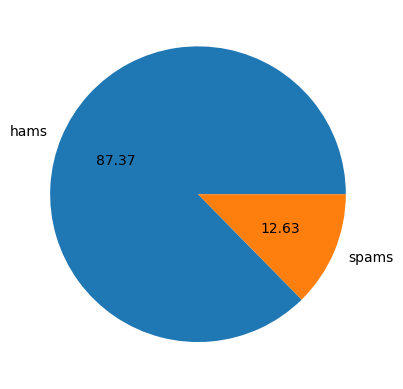

In [28]:
plt.pie(df['target'].value_counts(),labels=['hams','spams'],autopct='%0.2f')
plt.show()

# data is imblanced

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
df['num_characters'] = df['text'].apply(len)

In [32]:
#num of word

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
# number of sentences:

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
# we can clearly see that spam messages average character length is bigger than ham

<Axes: xlabel='num_characters', ylabel='Count'>

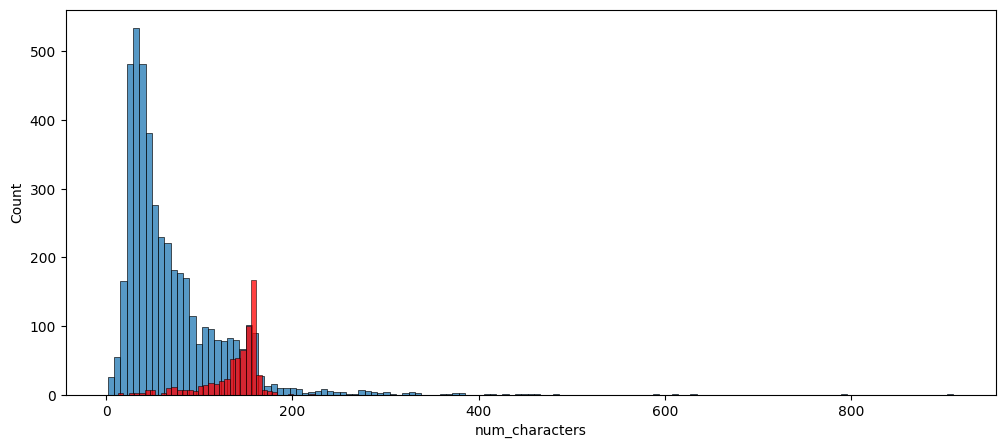

In [39]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

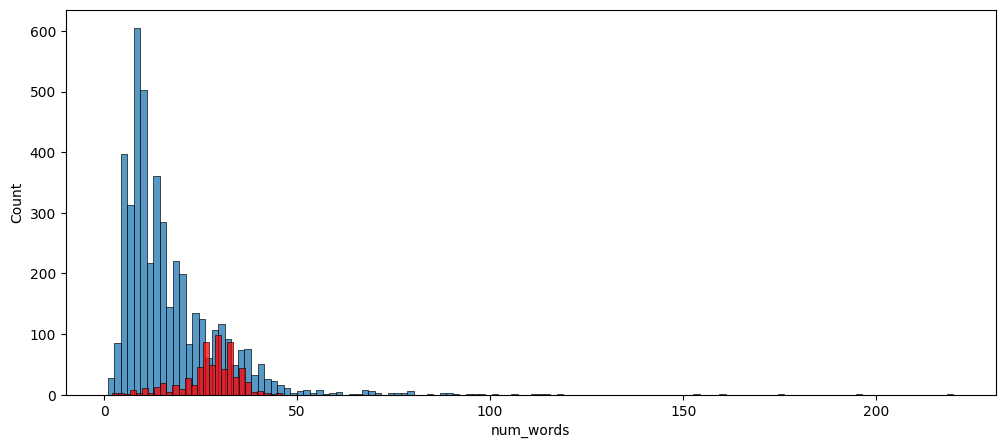

In [40]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<ipython-input-41-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

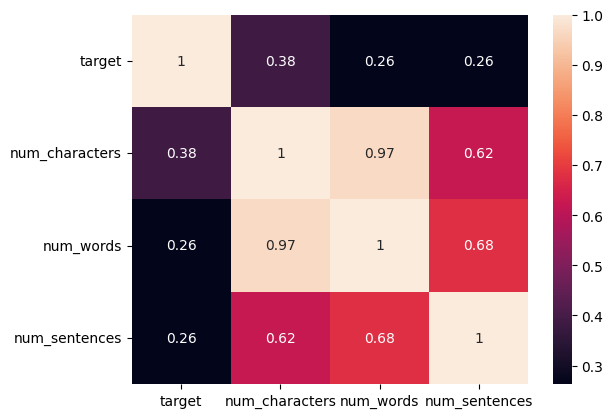

In [41]:
sns.heatmap(df.corr(),annot=True)

#Data Preprocessing

In [42]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
from nltk.corpus import stopwords
import string

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [45]:
def text_transformer(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():# alnum = alpha-numeric.
      y.append(i)


  text = y[:] #asssigning y to 'text' .... "[:]"" we had to do it because we cannot copy list directly we have to clone it.
  y.clear() #clearing y after assigning to text

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation: # will check word to words(i) and see if stopword == word(i)
      y.append(i)


  text = y[:]
  y.clear()

  for i in text :
    y.append(ps.stem(i))


  return " ".join(y)




In [46]:
df['transformed_text'] = df['text'].apply(text_transformer)

In [47]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [48]:
# WorldCloud - a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [50]:
span_wc =wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep="  "))

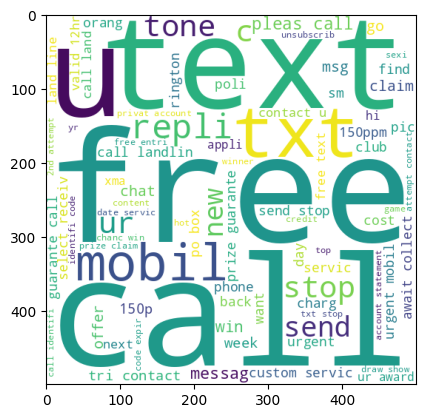

In [51]:
plt.imshow(span_wc)

In [52]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")) # getting str and concatenate on space to 'transformed_text'

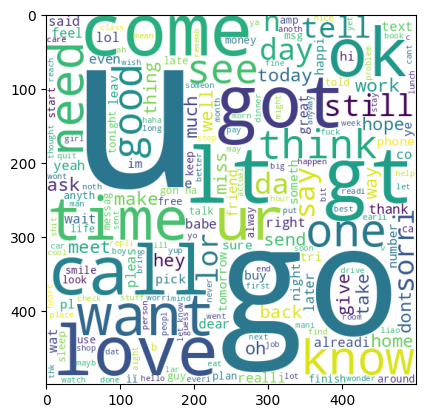

In [53]:
plt.imshow(ham_wc)

In [54]:
# getting most used word in spam:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist(): #will get list of strings
  for i in msg.split(): #iterating through every list(msg) and every word(i)
    spam_corpus.append(i)


In [55]:
len(spam_corpus)

9939

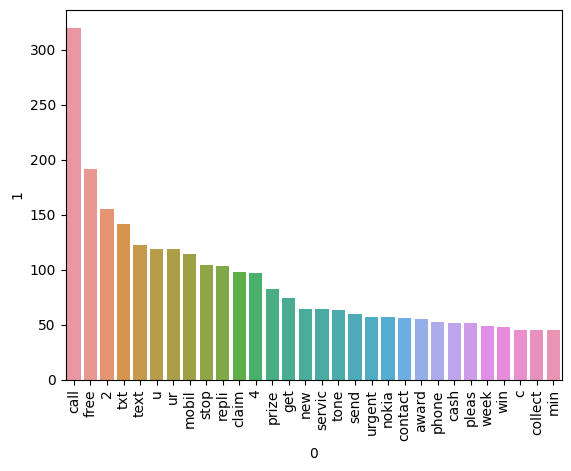

In [56]:
from collections import Counter #it will create a dictionary with count of occurance of each word
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()



In [57]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for i in msg.split():
    ham_corpus.append(i)

In [58]:
ham_counter = Counter(ham_corpus).most_common(30)

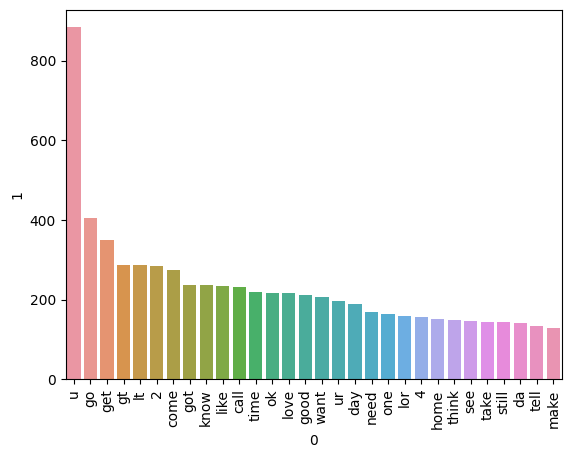

In [59]:
sns.barplot(x=pd.DataFrame(ham_counter)[0],y=pd.DataFrame(ham_counter)[1])
plt.xticks(rotation='vertical')
plt.show()

#Model Building

In [60]:
# We know that naiveBayes algorithm works best on textual data:
# NaiveBayes need numerical data,
# We have to convert text to numerical data/vectors,
# Bagsofword(frequent word) ,tfidf

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [62]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
x.shape

(5169, 3000)

In [64]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score


In [69]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1 ))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [71]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [72]:
#till noe bernoulli is performing well

bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3 ))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


WITH TFIDF VECTORIZER:


In [73]:
# WITH TFIDF VECTORIZER:

x = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
y = df['target'].values

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
gnb.fit(x_train,y_train)
y_pred4 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [78]:
mnb.fit(x_train,y_train)
y_pred5 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [79]:
bnb.fit(x_train,y_train)
y_pred6 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [80]:
# Here we choose TfidfVectorizer --> MultinomialNB

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel = 'sigmoid',gamma=1.0) #Support Vector Classification
mlb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgc = XGBClassifier(n_estimators = 50 , random_State = 2)


In [83]:
from nltk.corpus.reader import et
clfs = {
    'svc' : svc,
    'Nb' : mlb,
    'knc' : knc,
    'dtc' : dtc,
    'lrc' : lrc,
    'rfc' : rfc,
    'abc' : abc,
    'bc' : bc,
    'etc' : etc,
    'gbc' : gbc,
    'xgc' : xgc
}

In [84]:
def train_classifier(clf, x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  clf.predict(x_test)
  y_pred  = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy , precision

In [86]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
  print('for', name)
  print('accuracy = ',current_accuracy)
  print('precision = ',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)







for svc
accuracy =  0.9758220502901354
precision =  0.9747899159663865
for Nb
accuracy =  0.9709864603481625
precision =  1.0
for knc
accuracy =  0.9052224371373307
precision =  1.0
for dtc
accuracy =  0.9323017408123792
precision =  0.8333333333333334
for lrc
accuracy =  0.9584139264990329
precision =  0.9702970297029703
for rfc
accuracy =  0.9758220502901354
precision =  0.9829059829059829
for abc
accuracy =  0.960348162475822
precision =  0.9292035398230089
for bc
accuracy =  0.9584139264990329
precision =  0.8682170542635659
for etc
accuracy =  0.9748549323017408
precision =  0.9745762711864406
for gbc
accuracy =  0.9468085106382979
precision =  0.9191919191919192


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:47:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_State" } are not used.

  warnings.warn(smsg, UserWarning)


for xgc
accuracy =  0.9671179883945842
precision =  0.9262295081967213


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
1,Nb,0.970986,1.000000
2,knc,0.905222,1.000000
5,rfc,0.975822,0.982906
0,svc,0.975822,0.974790
8,etc,0.974855,0.974576
4,lrc,0.958414,0.970297
6,abc,0.960348,0.929204
10,xgc,0.967118,0.926230
9,gbc,0.946809,0.919192
7,bc,0.958414,0.868217


In [89]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')


In [90]:
performance_df1

,Algorithm,variable,value
0,Nb,Accuracy,0.970986
1,knc,Accuracy,0.905222
2,rfc,Accuracy,0.975822
3,svc,Accuracy,0.975822
4,etc,Accuracy,0.974855
5,lrc,Accuracy,0.958414
6,abc,Accuracy,0.960348
7,xgc,Accuracy,0.967118
8,gbc,Accuracy,0.946809
9,bc,Accuracy,0.958414


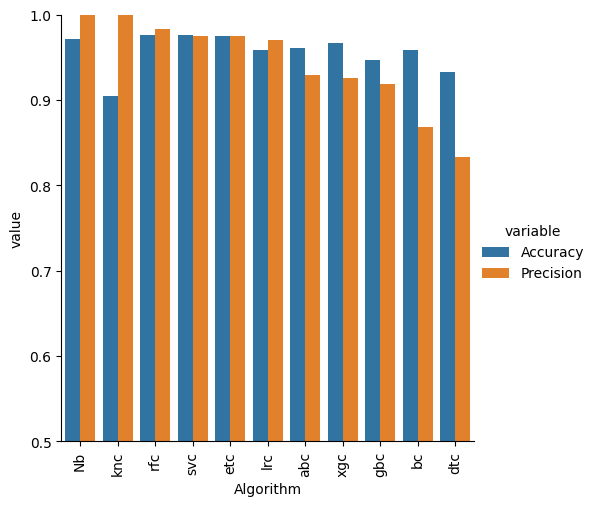

In [91]:
sns.catplot(x = 'Algorithm', y = 'value', hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
import pickle
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(mnb,open('model2.pkl','wb'))